<a href="https://colab.research.google.com/github/horasan/ml/blob/main/ceb_2_multi_linear_regression_house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
%matplotlib inline

In [2]:
# read data from google drive
drive.mount('/content/drive')
DRIVE_DATASET_PATH = "/content/drive/My Drive/Colab Notebooks/datasets/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
house_df = pd.read_csv(DRIVE_DATASET_PATH + "kc_house_data.csv", encoding = 'ISO-8859-1')

https://www.kaggle.com/datasets/harlfoxem/housesalesprediction

In [4]:
house_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530.0,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310.0,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020.0,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600.0,0,2004,0,98027,47.5345,-122.069,1410,1287


In [5]:
house_df.dropna(inplace=True)

In [6]:
house_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530.0,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310.0,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020.0,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600.0,0,2004,0,98027,47.5345,-122.069,1410,1287


In [7]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21611 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21611 non-null  int64  
 1   date           21611 non-null  object 
 2   price          21611 non-null  float64
 3   bedrooms       21611 non-null  int64  
 4   bathrooms      21611 non-null  float64
 5   sqft_living    21611 non-null  int64  
 6   sqft_lot       21611 non-null  int64  
 7   floors         21611 non-null  float64
 8   waterfront     21611 non-null  int64  
 9   view           21611 non-null  int64  
 10  condition      21611 non-null  int64  
 11  grade          21611 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21611 non-null  int64  
 14  yr_built       21611 non-null  int64  
 15  yr_renovated   21611 non-null  int64  
 16  zipcode        21611 non-null  int64  
 17  lat            21611 non-null  float64
 18  long       

In [8]:
house_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161100e+04,2.161100e+04,21611.000000,21611.000000,21611.000000,2.161100e+04,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000
mean,4.580327e+09,5.400850e+05,3.370830,2.114791,2079.853454,1.510771e+04,1.494332,0.007542,0.234325,3.409421,7.656888,1788.396095,291.457360,1971.007959,84.410069,98077.941928,47.560046,-122.213894,1986.559576,12769.025357
std,2.876592e+09,3.671430e+05,0.930092,0.770157,918.422406,4.142235e+04,0.540003,0.086521,0.766350,0.650755,1.175502,828.128162,442.487355,29.372358,401.697007,53.505054,0.138568,0.140831,685.416548,27305.369808
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.217250e+05,3.000000,1.750000,1426.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470950,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068850e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.500000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# STEP #2: VISUALIZE DATASET

In [9]:
selected_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement']

In [10]:
X = house_df[selected_features]
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement
0,3,1.00,1180,5650,1.0,1180.0,0
1,3,2.25,2570,7242,2.0,2170.0,400
2,2,1.00,770,10000,1.0,770.0,0
3,4,3.00,1960,5000,1.0,1050.0,910
4,3,2.00,1680,8080,1.0,1680.0,0
...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,1530.0,0
21609,4,2.50,2310,5813,2.0,2310.0,0
21610,2,0.75,1020,1350,2.0,1020.0,0
21611,3,2.50,1600,2388,2.0,1600.0,0


In [11]:
y = house_df['price']
y

,price
0,221900.0
1,538000.0
2,180000.0
3,604000.0
4,510000.0
...,...
21608,360000.0
21609,400000.0
21610,402101.0
21611,400000.0


In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21611 entries, 0 to 21612
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21611 non-null  int64  
 1   bathrooms      21611 non-null  float64
 2   sqft_living    21611 non-null  int64  
 3   sqft_lot       21611 non-null  int64  
 4   floors         21611 non-null  float64
 5   sqft_above     21611 non-null  float64
 6   sqft_basement  21611 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 1.3 MB


In [13]:
y.shape

(21611,)

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
y = y.values.reshape(-1,1)

In [16]:
y_scaled = scaler.fit_transform(y)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [18]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16208 entries, 5861 to 421
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       16208 non-null  int64  
 1   bathrooms      16208 non-null  float64
 2   sqft_living    16208 non-null  int64  
 3   sqft_lot       16208 non-null  int64  
 4   floors         16208 non-null  float64
 5   sqft_above     16208 non-null  float64
 6   sqft_basement  16208 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 1013.0 KB


In [19]:
  from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept = True)


In [20]:
regressor.fit(X_train, y_train)

LinearRegression()

In [21]:
print('Linear Model Coeff (m)', regressor.coef_)
print('Linear Model Coeff (b)', regressor.intercept_)

Linear Model Coeff (m) [[-7.03182408e+04  7.17665971e+03  2.17449225e+02 -3.37614538e-01
   9.90706817e+03  9.11831518e+01  1.26266073e+02]]
Linear Model Coeff (b) [99787.15837359]


In [22]:
y_predict = regressor.predict(X_test)

(0.0, 3000000.0)

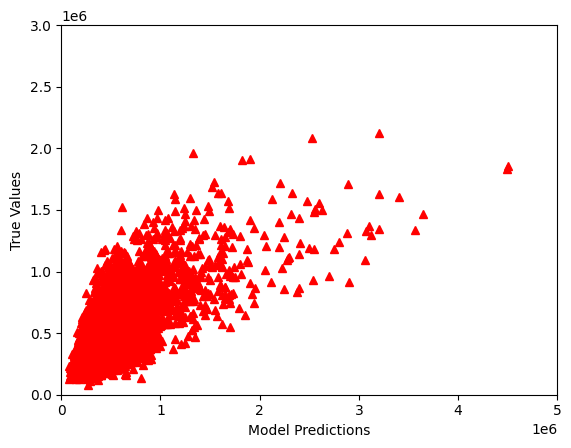

In [23]:
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')
plt.xlim(0, 5000000)
plt.ylim(0, 3000000)

In [24]:
k = X_test.shape[1]
n = len(X_test)

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)

RMSE = 262512.156 
MSE = 68912632029.1064 
MAE = 169364.622294387 
R2 = 0.4937918340821795 
Adjusted R2 = 0.49313503015976534


# Now, let's use more features!

In [25]:
more_selected_features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors', 'sqft_above', 'sqft_basement', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'yr_built',
'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

X = house_df[more_selected_features]

In [26]:
y = house_df['price']

In [27]:
y = y.values.reshape(-1,1)

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [29]:
  from sklearn.linear_model import LinearRegression
regressor_2 = LinearRegression(fit_intercept = True)

In [30]:
regressor_2.fit(X_train, y_train)

LinearRegression()

In [31]:
print('Linear Model Coeff (m) [with selected feature]', regressor.coef_)
print('Linear Model Coeff (b) [with selected feature]', regressor.intercept_)

print('Linear Model Coeff (m) [with more_selected feature]', regressor_2.coef_)
print('Linear Model Coeff (b) [with more_selected feature]', regressor_2.intercept_)

Linear Model Coeff (m) [with selected feature] [[-7.03182408e+04  7.17665971e+03  2.17449225e+02 -3.37614538e-01
   9.90706817e+03  9.11831518e+01  1.26266073e+02]]
Linear Model Coeff (b) [with selected feature] [99787.15837359]
Linear Model Coeff (m) [with more_selected feature] [[-3.34270973e+04  3.70681650e+04  9.51523291e+01  1.36707241e-01
   4.86098583e+03  4.02212400e+01  5.49310887e+01  6.24837501e+05
   4.92899692e+04  2.54541985e+04  9.95832488e+04  4.02212400e+01
  -2.61329324e+03  1.90074085e+01 -5.57623216e+02  6.03002744e+05
  -2.00508479e+05  2.20686769e+01 -3.93861199e-01]]
Linear Model Coeff (b) [with more_selected feature] [5958785.95772672]


In [32]:
y_predict_2 = regressor_2.predict(X_test)

(0.0, 3000000.0)

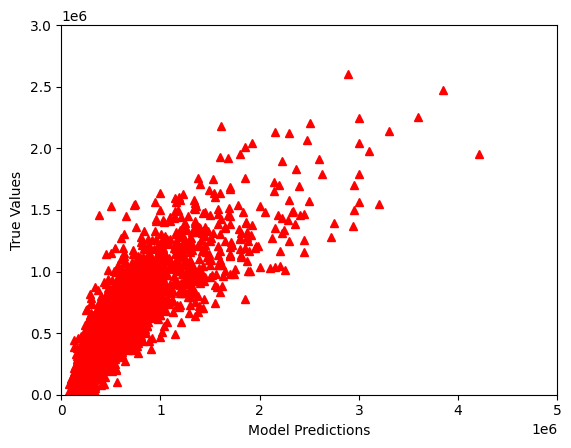

In [33]:
plt.plot(y_test, y_predict_2, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')
plt.xlim(0, 5000000)
plt.ylim(0, 3000000)

In [34]:
k = X_test.shape[1]
n = len(X_test)

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE_2 = float(format(np.sqrt(mean_squared_error(y_test, y_predict_2)),'.3f'))
MSE_2 = mean_squared_error(y_test, y_predict_2)
MAE_2 = mean_absolute_error(y_test, y_predict_2)
r2_2 = r2_score(y_test, y_predict_2)
adj_r2_2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE_2 =',RMSE_2, '\nMSE_2 =',MSE_2, '\nMAE_2 =',MAE_2, '\nR2_2 =', r2_2, '\nAdjusted R2_2 =', adj_r2_2)

RMSE_2 = 205705.178 
MSE_2 = 42314620052.79323 
MAE_2 = 126459.56159511583 
R2_2 = 0.6969274421523011 
Adjusted R2_2 = 0.49200510639270556


In [39]:
print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)
print('\n')
print('\nwith more features\n------------------\n')
print('RMSE_2 =',RMSE_2, '\nMSE_2 =',MSE_2, '\nMAE_2 =',MAE_2, '\nR2_2 =', r2_2, '\nAdjusted R2_2 =', adj_r2_2)


RMSE = 262512.156 
MSE = 68912632029.1064 
MAE = 169364.622294387 
R2 = 0.4937918340821795 
Adjusted R2 = 0.49313503015976534



with more features
------------------

RMSE_2 = 205705.178 
MSE_2 = 42314620052.79323 
MAE_2 = 126459.56159511583 
R2_2 = 0.6969274421523011 
Adjusted R2_2 = 0.49200510639270556
